# Cardiovascular Disease Prediction using Machine Learning

In this project, we predict the possibility of (cardiovascular) heart disease in individuals.

## 1. Introduction and Objectives

This project aims to leverage the power of machine learning (ML) to develop a robust and interpretable predictive model for CVD. By incorporating Explainable AI (XAI) techniques, the model strives to address the "black-box" nature of traditional ML models, enhancing the trust and understanding of healthcare professionals. Additionally, the integration of risk stratification will provide a comprehensive assessment of patient risk levels, ensuring actionable insights for clinical decision-making. <br />

Objectives
- O1: Conduct a detailed study on cardiovascular diseases - Research and understand the
basic concepts of CVD and its risk factors. <br />
- O2: Perform Exploratory Data Analysis (EDA)- Apply appropriate data preprocessing techniques to ensure the dataset used in this study is of high quality. <br />

- O3: Evaluate Established Machine Learning Models- Investigate and evaluate the suitability of various models, such as Logistic Regression, Random Forests, and Deep learning techniques, for predicting cardiovascular disease. <br />
- O4: Optimal Feature Selection- Identify significant predictive features whose presence improves the accuracy of CVD prediction. <br />
- O5: Machine Learning Model Development- Develop a model for predicting cardiovascular diseases with various ML algorithms, deep learning techniques, and risk stratification. <br />
- O6: Model Performance Evaluation- Evaluate the developed model to check its predictive accuracy and interpretability by employing relevant evaluation metrics.


## Attribute Description


- **male**: Binary indicator (1 = Male, 0 = Female)
- **age**: Age of the individ rs)
- **education**: Level of educacal)
- **currentSmoker**: Binary indicator (1 = Current smoker, 0 = Non-smoker)
- **cigsPerDay**: Number of cigarettes smoked per day
- **BPMeds**: Binary indicator (1 = Taking blood pressure medication, 0 = Not taking)
- **prevalentStroke**: Binary indicator (1 = History of stroke, 0 = No history)
- **prevalentHyp**: Binary indicator (1 = History of hypertension, 0 = No history)
- **diabetes**: Binary indicator (1 = Diagnosed with diabetes, 0 = Not diagnosed)
- **totChol**: Total cholesterol level (mg/dL)
- **sysBP**: Systolic blood pressure (mmHg)
- **diaBP**: Diastolic blood pressure (mmHg)
- **BMI**: Body Mass Index (BMI) of the individual
- **heartRate**: Resting heart rate (beats per minute)
- **glucose**: Blood glucose level (mg/dL)
- **TenYearCHD**: Binary target variable (1 = Individual developed CHD within 10 years, 0 = Didnot develop CHD)


In [2]:
# import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
import shap
import lime
import lime.lime_tabular
import joblib

In [4]:
heart_data = pd.read_csv('data/framingham.csv')
# Print the first 10 lines of the dataset
print(heart_data.head(10)) 

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  2

## 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in understanding the structure, relationships, and patterns in the dataset. Below, we perform detailed analyses using descriptive statistics, visualizations, and correlation heatmaps to uncover key insights about heart disease.

In [100]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [102]:
# Checking the data shape
heart_data.shape

(4240, 16)


The dataset has 4240 rows and 16 columns for different attributes. In the next step, we check for missing values in the data.

In [105]:
# Check for Missing Values
print("Missing Values:\n", heart_data.isnull().sum())

Missing Values:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


There are missing values in certain attributes like education, cigsPerDay, BPMeds, totChol, BMI, heartRate amd glucose 

In [5]:
# Remove rows with missing values
heart_data = heart_data.dropna()

# Verify if all missing values are removed
print("Missing Values After Removal:\n", heart_data.isnull().sum())


Missing Values After Removal:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


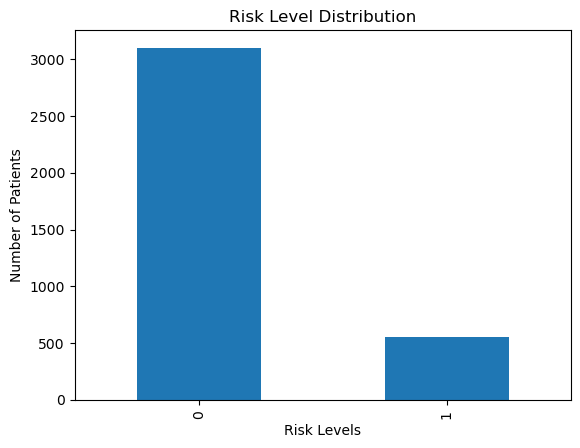

TenYearCHD
0    3101
1     557
Name: count, dtype: int64


In [110]:
# Plot risk level distribution
heart_data['TenYearCHD'].value_counts().plot(kind='bar')
plt.title("Risk Level Distribution")
plt.xlabel("Risk Levels")
plt.ylabel("Number of Patients")
plt.show()
print(heart_data['TenYearCHD'].value_counts())

There is a class imbalance in the TenYearCHD class.

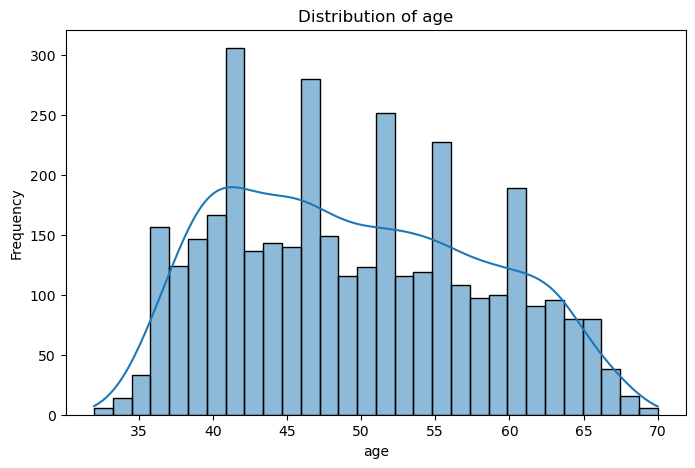

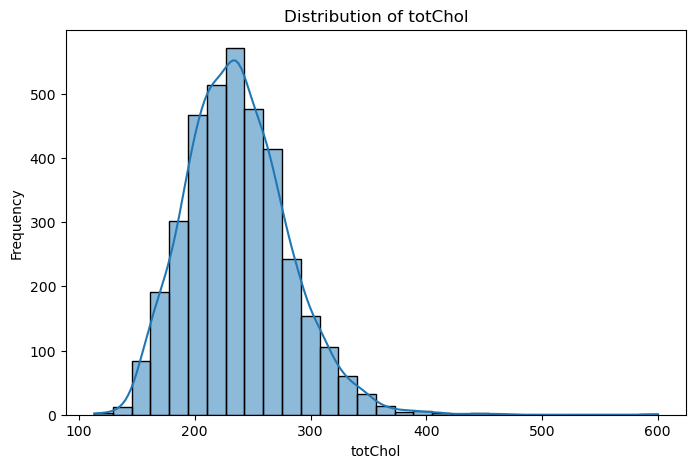

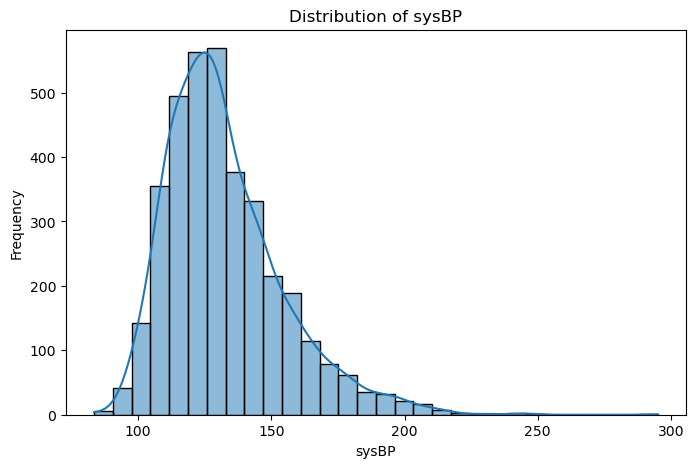

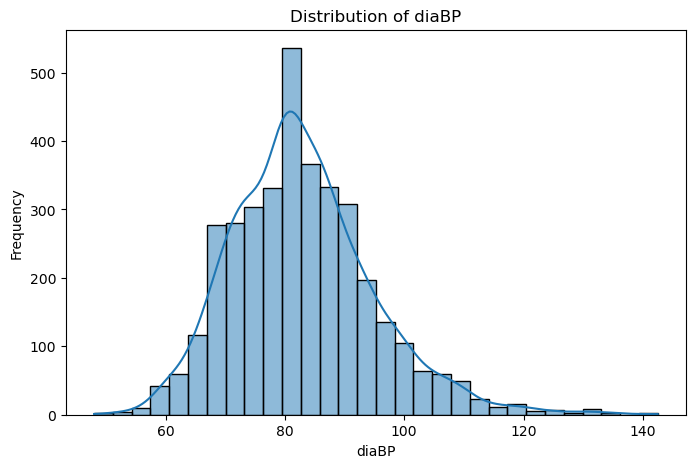

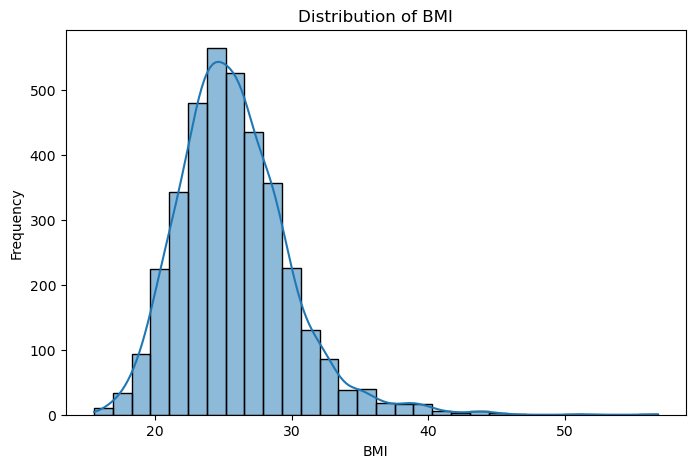

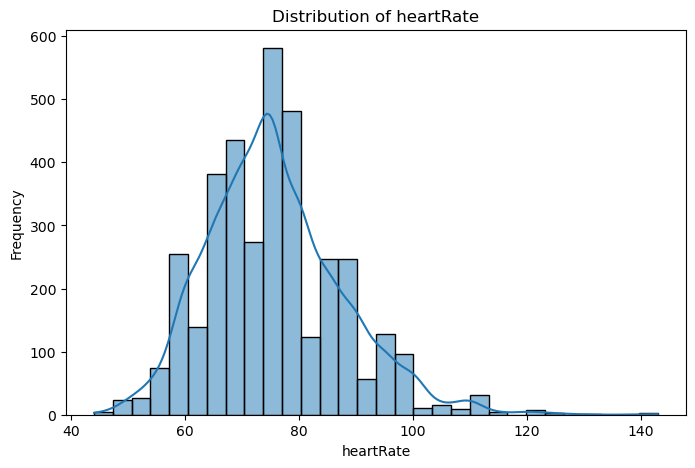

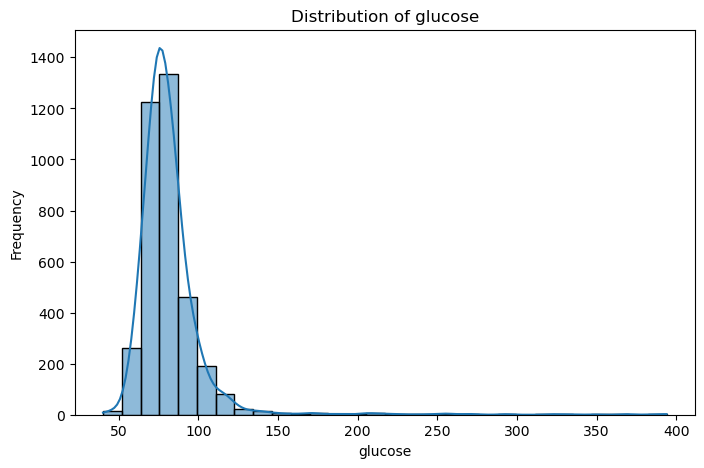

In [25]:
# Distribution of key numeric features
key_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate','glucose']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(heart_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

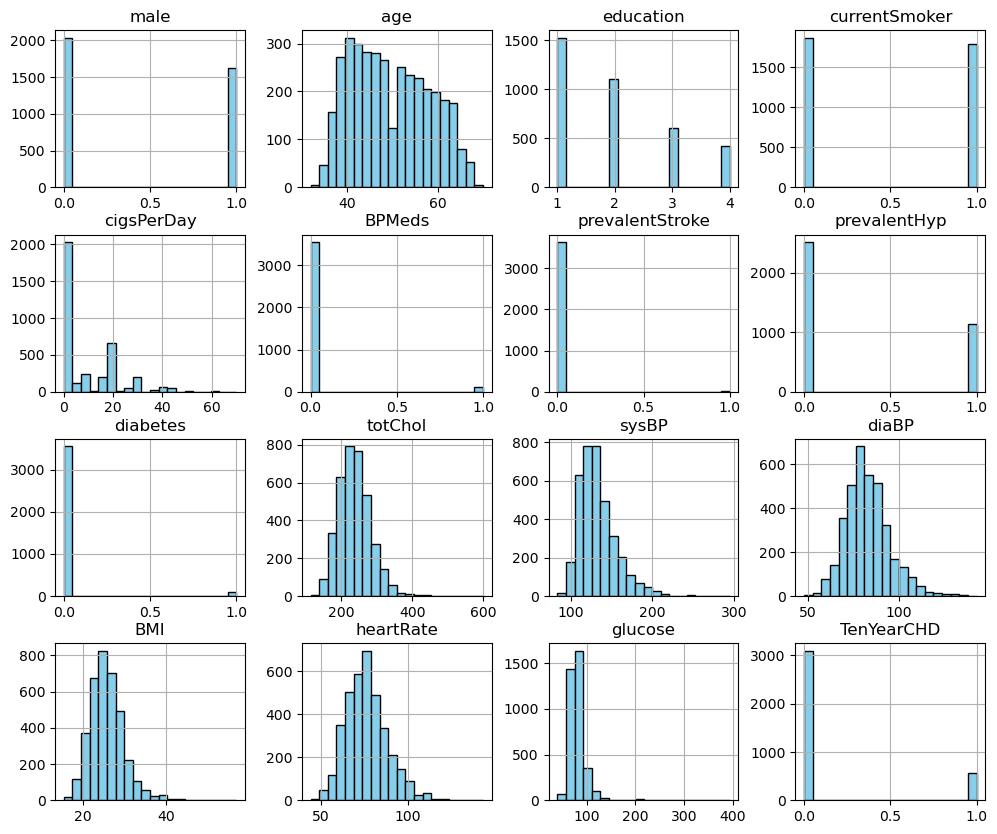

In [115]:
heart_data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

##### Insights from histograms 

- Age: The distribution is slightly right-skewed, with most individuals between 40 to 60 years. </br>
- CigsPerDay: The majority of people either don’t smoke or smoke very little. </br>
- TotChol: Roughly normal distribution, centered around 200–250 mg/dL. </br>
- SysBP: Slightly right-skewed, with most values between 110 and 180 mmHg. </br>
- Heart Rate: Normally distributed, with most values around 60–90 bpm.

In [117]:
# Statistical measure of data
pd.set_option("display.float", "{:.2f}".format)
heart_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00
mean,0.44,49.55,1.98,0.49,9.03,0.03,0.01,0.31,0.03,236.85,132.37,82.92,25.78,75.73,81.85,0.15
std,0.50,8.56,1.02,0.50,11.92,0.17,0.08,0.46,0.16,44.10,22.09,11.97,4.07,11.98,23.90,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,113.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,0.00,42.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.08,68.00,71.00,0.00
50%,0.00,49.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00,0.00
75%,1.00,56.00,3.00,1.00,20.00,0.00,0.00,1.00,0.00,263.00,143.88,90.00,28.04,82.00,87.00,0.00
max,1.00,70.00,4.00,1.00,70.00,1.00,1.00,1.00,1.00,600.00,295.00,142.50,56.80,143.00,394.00,1.00


##### **Insights**
The dataset consists of 44% males and 56% females, making it relatively balanced. <br>
Age : The dataset contains individuals aged 32 to 70 years, with a median of 49 years. <br>

Cholesterol levels range from 113 to 600 mg/dL.<br>
BPMeds (0.03 mean): Only 3% of the population is on blood pressure medication.<br>
Prevalent Stroke (0.01 mean): Stroke cases are very rare (only 1% of individuals).<br>
31% of individuals have hypertension, which is a significant portion of the dataset.<br>

BMI (Mean: 25.78, Max: 56.80): The average BMI is 25.78, which is considered slightly overweight.  <br>

Only 3% of individuals have diabetes, meaning it's an imbalanced feature. <br>
TenYearCHD (0.15 mean): 15% of individuals have developed CHD (Cardiovascular Disease) within ten years.<br>
The dataset is imbalanced, as 85% did not develop CHD.<br>

Almost half of the population are current smokers.<br>
CigsPerDay (Mean: 9.03, Max: 70):  The median (50%) is 0, meaning at least half of the individuals don’t smoke.<br>
However, some individuals smoke as many as 70 cigarettes per day.<br>


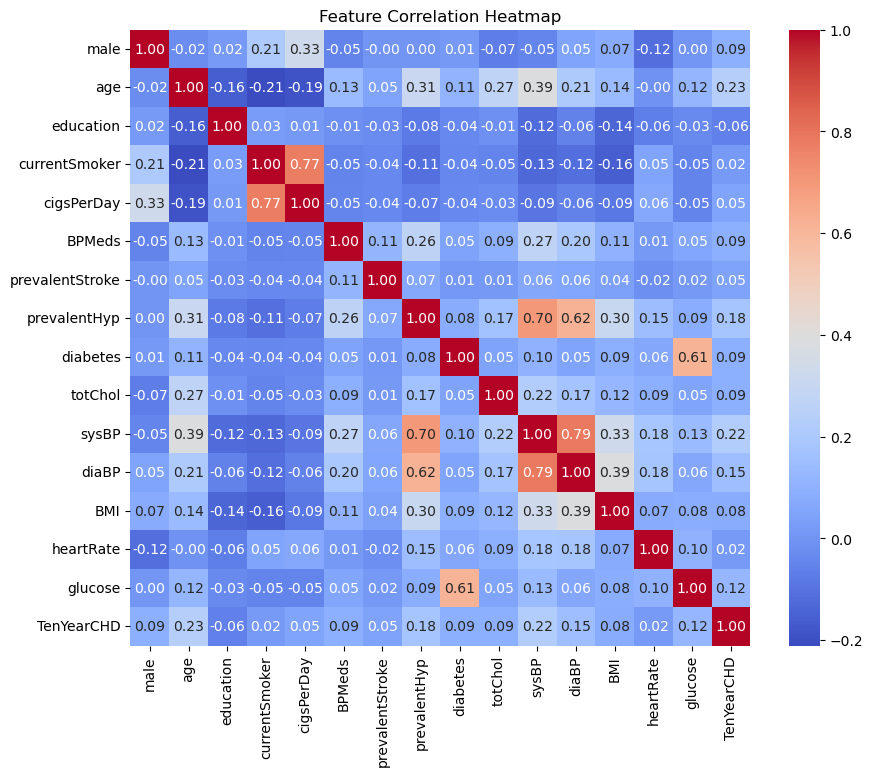

In [119]:
# Convert all columns to numeric where possible
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [121]:
# Select numeric data
numeric_data = heart_data.select_dtypes(include=['float64', 'int64'])

# Compute correlations with 'TenYearCHD'
correlations = numeric_data.drop('TenYearCHD', axis=1).corrwith(numeric_data['TenYearCHD'])

# Plot correlation using hvplot
import hvplot.pandas  # Ensure hvplot is imported
correlations.hvplot.barh(
    width=600, height=400,
    title="Correlation between Heart Disease and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

##### **Feature Correlation Analysis**

The correlation heatmap visually represents the relationships between various features in the dataset. It highlights both positive and negative correlations, which can be used to select significant predictors for the model. Features with strong correlations (positive or negative) with the target variable (`TenYearCHD`) are crucial for prediction.

##### **Key Observations**:
1. **Strong Correlations**:
   - `Age` shows a high positive correlation with the target variable (`TenYearCHD`), indicating people who are older have more risk of heart disease.
   - `sysBP` and `prevalentHyp ` also show a slight positive correlation with `TenYearCHD`.
   - `sysBP` and `diaBP` are strongly correlated with each other.

2. **Negative Correlations**:
   - `education` has a  negative correlation with `TenYearCHD`, suggesting an inverse proportion.

3. **Low or Neutral Correlations**:
   - Features like `heartRate` and `currentSmoker` have weaker correlations with the target variable.

## 3. Data Processing 

After exploring the dataset, the following preprocessing steps were carried out.
#### **1. Handling Missing Values**
- Rows or columns with significant missing values were removed to avoid introducing bias into the model.
- **Justification**: Imputation techniques were considered but not implemented due to potential distortion in small datasets. Eliminating incomplete data ensures that the model trains on accurate information.

#### **2. Splitting the Dataset**
- The dataset was split into training and testing sets (80% training, 20% testing).
- **Justification**: This ensures that the model can generalize to unseen data, allowing for reliable evaluation of its performance.

#### **3. Feature Scaling**
- Standardization was applied to scale features like cholesterol and blood pressure to have a mean of zero and a standard deviation of one.
- **Justification**: Scaling ensures that the gradient-based optimization processes during model training converge more efficiently.


We dropped the rows with missing values in ca and thal which consist of 6 rows.
Hence, the remaning number of rows is 297.

In [14]:
# Separate features and target variable
X = heart_data.drop(columns=["TenYearCHD"]) #Features
y = heart_data["TenYearCHD"] # target

# Standardize continuous variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
joblib.dump(scaler, "model/scaler_framingham.pkl")

# Output Dataset Shapes
print("Full Dataset Shape:", X.shape)
print("Training Dataset Shape:", X_train.shape)
print("Testing Dataset Shape:", X_test.shape)

Full Dataset Shape: (3658, 15)
Training Dataset Shape: (2926, 15)
Testing Dataset Shape: (732, 15)


## 4. Feature Selection and Importance 

In [53]:
# 3. SelectKBest Using Chi-Squared Test
# Note: Chi-squared requires non-negative data, so ensure normalization
from sklearn.feature_selection import chi2,SelectKBest
chi2_selector = SelectKBest(chi2, k=5)  # Select top 5 features
chi2_selector.fit(X, y)

chi2_selected_features = X.columns[chi2_selector.get_support()]
print("\nSelected Features by Chi-Squared Test:\n", chi2_selected_features)


Selected Features by Chi-Squared Test:
 Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'], dtype='object')


'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'. <br>
These features likely have a strong relationship with the target variable.

In [ ]:
# # Feature Importance
# from sklearn.feature_selection import rf
# feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
# feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
# print("Feature Importances:\n", feature_importances)

# sns.barplot(x='Importance', y='Feature', data=feature_importances)
# plt.title("Feature Importances")
# plt.show()

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 5 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print("Top Features Based on ANOVA F-test:")
print(feature_scores.sort_values(by='Score', ascending=False))


Top Features Based on ANOVA F-test:
            Feature  Score
1               age 211.75
10            sysBP 191.00
7      prevalentHyp 124.38
11            diaBP  84.30
14          glucose  55.23
8          diabetes  32.20
0              male  31.00
9           totChol  30.76
5            BPMeds  29.29
12              BMI  24.78
2         education  14.70
4        cigsPerDay   9.92
6   prevalentStroke   8.57
13        heartRate   1.54
3     currentSmoker   1.34


Age shows the highest F-test score, making it a significant predictor for heart disease. <br>
Both methods highlight overlapping features (age, sysBP , glucose), validating their importance for prediction.

In [59]:
# Boxplot 

In [27]:
def framingham_risk_score(age, totChol, hdl, sysBP, smoker, diabetes, gender):
    if gender == 1:  # Male
        risk_score = (52.00961 - (20.014077 * np.log(age)) + (0.65304 * np.log(totChol))
                      - (0.38698 * np.log(hdl)) + (1.90997 * np.log(sysBP)) + (0.60138 * smoker)
                      + (0.57367 * diabetes))
        s0 = 0.88936  # Baseline survival probability for men
    else:  # Female
        risk_score = (31.764 - (26.0145 * np.log(age)) + (1.1237 * np.log(totChol))
                      - (0.93263 * np.log(hdl)) + (2.5536 * np.log(sysBP)) + (0.65451 * smoker)
                      + (0.87976 * diabetes))
        s0 = 0.95012  # Baseline survival probability for women

    risk_percentage = 1 - s0 ** (np.exp(risk_score))
    return round(risk_percentage * 100, 2)

# Compute Framingham Risk Score for each row
heart_data["FraminghamRisk"] = heart_data.apply(lambda row: framingham_risk_score(row["age"], row["totChol"], 
                                                                  row["diaBP"], row["sysBP"], 
                                                                  row["currentSmoker"], row["diabetes"], row["male"]), axis=1)

# Define Risk Stratification (Low, Medium, High)
def stratify_risk(risk_score):
    if risk_score < 10:
        return "Low Risk"
    elif risk_score < 20:
        return "Moderate Risk"
    else:
        return "High Risk"

heart_data["RiskCategory"] = heart_data["FraminghamRisk"].apply(stratify_risk)



In [37]:
!pip install ace_tools

In [38]:
# Display the dataset with risk scores
import ace_tools as tools
tools.display_dataframe_to_user(name="Heart Disease Data with Risk Scores", dataframe=heart_data)


ModuleNotFoundError: No module named 'ace_tools'

## Logistic Regression

Logistic Regression :
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       621
           1       0.30      0.61      0.41       111

    accuracy                           0.73       732
   macro avg       0.61      0.68      0.61       732
weighted avg       0.82      0.73      0.76       732



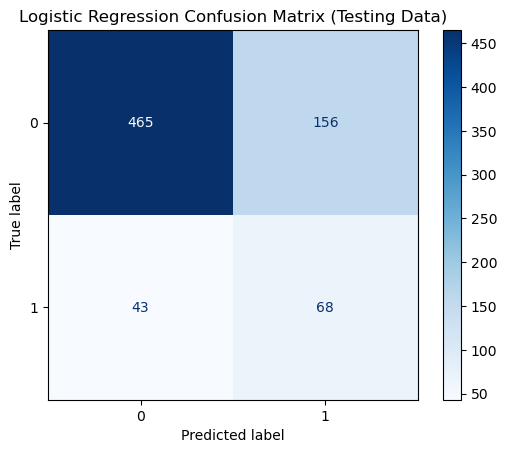

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Initialize Logistic Regression with balanced class weights
logistic_model = LogisticRegression(class_weight="balanced", random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make Predictions
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Adjust Decision Threshold to Improve Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # Maximizing F1 Score
y_pred = (y_pred_prob > best_threshold).astype(int)  # Apply new threshold

# Compute Performance Metrics
auc_lr = roc_auc_score(y_test, y_pred_prob)  # Use probabilities for AUC
f1_lr = f1_score(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred)

# Print Classification Report
print("Logistic Regression :")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm_test_lr = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test_lr, display_labels=np.unique(y_train)).plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix (Testing Data)")
plt.show()


#### Observations

## Random Forest 

Random Forest :
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       621
           1       0.31      0.29      0.30       111

    accuracy                           0.79       732
   macro avg       0.59      0.59      0.59       732
weighted avg       0.79      0.79      0.79       732



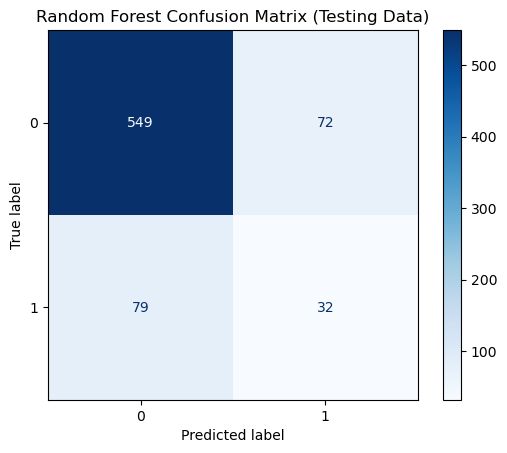

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize Random Forest with balanced class weights
random_forest_model = RandomForestClassifier(
    n_estimators=200,         # More trees for better generalization
    max_depth=10,             # Limits tree depth to prevent overfitting
    min_samples_split=10,     # Minimum samples to split nodes
    class_weight="balanced",  # Fixes class imbalance
    random_state=42
)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make Predictions
y_pred = random_forest_model.predict(X_test)
y_pred_prob = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Compute Performance Metrics
auc_rf = roc_auc_score(y_test, y_pred_prob)  # Use probabilities for AUC
f1_rf = f1_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)

# Print Classification Report
print("Random Forest :")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm_test_rf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=np.unique(y_train)).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix (Testing Data)")
plt.show()


#### Observations

### Decision Trees


Classification Report (Testing Data - Decision Tree):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       621
           1       0.25      0.25      0.25       111

    accuracy                           0.77       732
   macro avg       0.56      0.56      0.56       732
weighted avg       0.77      0.77      0.77       732



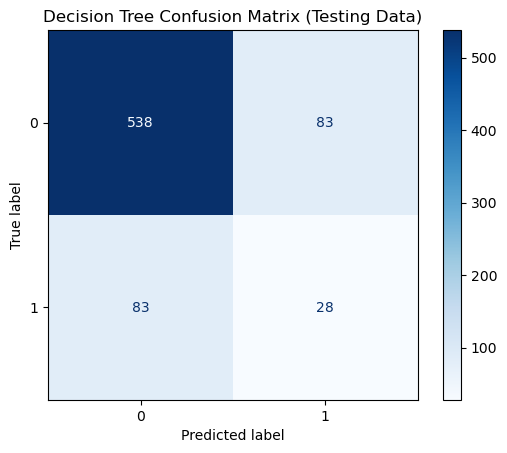

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score
# Define and Train the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make Predictions
Y_train_pred_dt = dt_model.predict(X_train)  # Predictions on Training Set
Y_test_pred_dt = dt_model.predict(X_test)    # Predictions on Testing Set

# Evaluate Training and Testing Scores
train_accuracy_dt = accuracy_score(y_train, Y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, Y_test_pred_dt)

# print("Training Accuracy (Decision Tree):", train_accuracy_dt)
# print("Testing Accuracy (Decision Tree):", test_accuracy_dt)


# Compute performance metrics
accuracy_dt = accuracy_score(y_test, Y_test_pred_dt)
f1_dt = f1_score(y_test, Y_test_pred_dt)
auc_roc_dt = roc_auc_score(y_test, Y_test_pred_dt)

# Classification Report for Testing Set
print("\nClassification Report (Testing Data - Decision Tree):")
print(classification_report(y_test, Y_test_pred_dt))

# Confusion Matrix for Testing Set
cm_test_dt = confusion_matrix(y_test, Y_test_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_test_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Testing Data)")
plt.show()

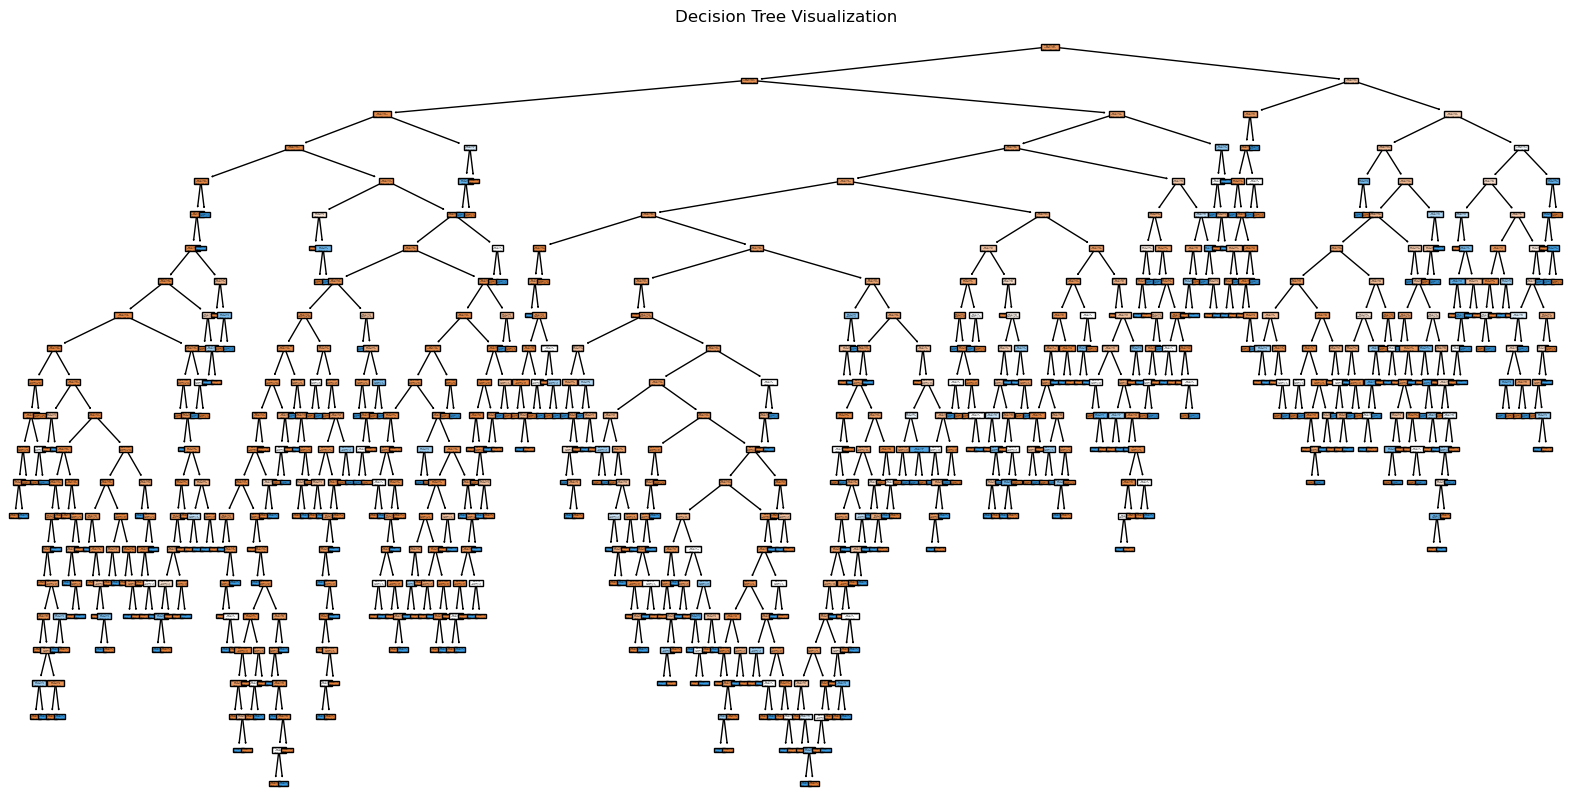


Decision Tree Rules:
|--- sysBP <= 1.04
|   |--- age <= 0.11
|   |   |--- BMI <= 3.20
|   |   |   |--- cigsPerDay <= 0.04
|   |   |   |   |--- diaBP <= 2.20
|   |   |   |   |   |--- totChol <= 4.05
|   |   |   |   |   |   |--- heartRate <= 2.74
|   |   |   |   |   |   |   |--- BPMeds <= 2.74
|   |   |   |   |   |   |   |   |--- prevalentHyp <= 0.41
|   |   |   |   |   |   |   |   |   |--- totChol <= -0.89
|   |   |   |   |   |   |   |   |   |   |--- glucose <= -0.60
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- glucose >  -0.60
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- totChol >  -0.89
|   |   |   |   |   |   |   |   |   |   |--- totChol <= -0.87
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- totChol >  -0.87
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of dep

In [133]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Export Decision Tree Rules as Text
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


## Deep Learning (FNNN)

Epoch 1/50


c:\Users\fathi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7274 - loss: 0.5518 - val_accuracy: 0.8484 - val_loss: 0.4105
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3789 - val_accuracy: 0.8525 - val_loss: 0.3968
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.3760 - val_accuracy: 0.8443 - val_loss: 0.3944
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8457 - loss: 0.3961 - val_accuracy: 0.8511 - val_loss: 0.3926
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8504 - loss: 0.3751 - val_accuracy: 0.8484 - val_loss: 0.3954
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.3709 - val_accuracy: 0.8497 - val_loss: 0.3943
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.3712 - val_accuracy: 0.8484 - val_loss: 0.3914
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8542 - loss: 0.3665 - val_accuracy: 0.8511 - val_loss: 0.3938
Epo

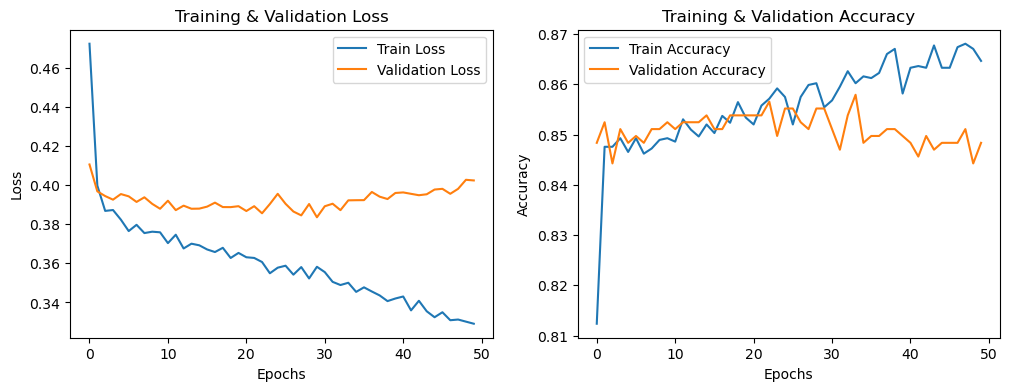

Accuracy: 0.8484
F1 Score: 0.2550
AUC-ROC: 0.7182


NameError: name 'fpr' is not defined

<Figure size 800x600 with 0 Axes>

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, f1_score, classification_report
import pandas as pd

# Define the Feedforward Neural Network (FNN) model
def create_fnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),  # Regularization to prevent overfitting
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='tanh'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Create model
input_shape = X_train.shape[1]  # Number of features
fnn_model = create_fnn_model(input_shape)

# Train the model
history=fnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred_prob = fnn_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate evaluation metrics
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store results
results = {
    "Feedforward Neural Network (FNN)": {
        "AUC-ROC": auc,
        "F1 Score": f1
    }
}

# Print classification report
print("Feedforward Neural Network (FNN):\n", classification_report(y_test, y_pred))

# Plot Training Loss & Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.show()

# Compute performance metrics
accuracy_fnn = accuracy_score(y_test, y_pred)
f1_fnn = f1_score(y_test, y_pred)
auc_roc_fnn = roc_auc_score(y_test, y_pred_prob)

# Compute ROC Curve
fpr_fnn, tpr_fnn, _ = roc_curve(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy_fnn:.4f}")
print(f"F1 Score: {f1_fnn:.4f}")
print(f"AUC-ROC: {auc_roc_fnn:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC-ROC = {auc_roc_fnn:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Feedforward Neural Network (FNN)")
plt.legend()
plt.show()


## Performance of all models

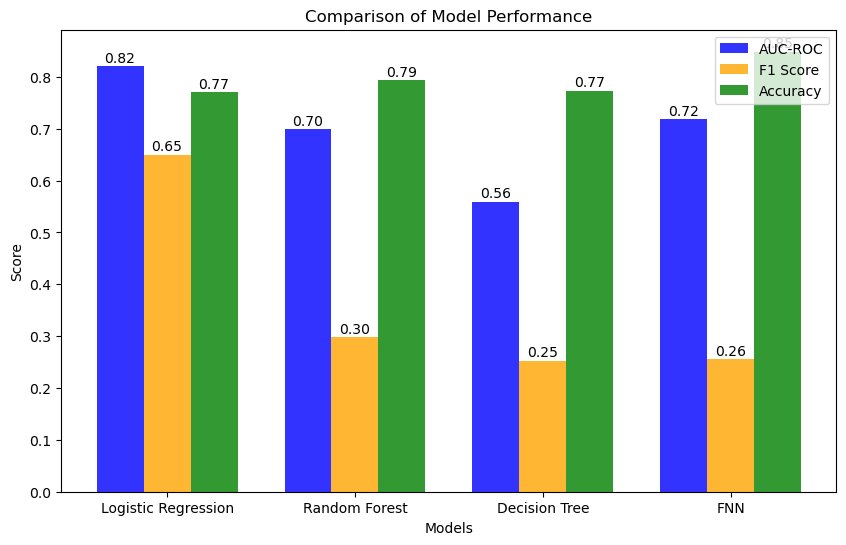

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual results
models = ["Logistic Regression", "Random Forest", "Decision Tree", "FNN"]
auc_scores = [0.82, auc_rf, auc_roc_dt, auc_roc_fnn]  # Example AUC-ROC scores
f1_scores = [0.65,f1_rf, f1_dt, f1_fnn]   # Example F1 scores
accuracy_scores = [0.77, accuracy_rf, accuracy_dt, accuracy_fnn]  # Example Accuracy scores

# Plot Model Performance
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25  # Reduce bar width to fit all bars properly

x = np.arange(len(models))

bars1 = ax.bar(x - width, auc_scores, width, label="AUC-ROC", alpha=0.8, color="blue")
bars2 = ax.bar(x, f1_scores, width, label="F1 Score", alpha=0.8, color="orange")
bars3 = ax.bar(x + width, accuracy_scores, width, label="Accuracy", alpha=0.8, color="green")

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Comparison of Model Performance")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bar_group in [bars1, bars2, bars3]:
    for bar in bar_group:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.show()


# Conclusion
FNN has the highest accuracy. Hence, the model will be developed using FNN.

In [13]:
# Save the trained model and scaler
fnn_model.save("fnn_model.h5")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [46]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode="classification",
                                                   feature_names=heart_data.columns[:-2],
                                                   class_names=["No CHD", "CHD"],
                                                   discretize_continuous=True)

idx = 5  # Pick a random test case
exp = explainer.explain_instance(X_test[idx], rf_model.predict_proba)
exp.show_in_notebook()


In [45]:
import streamlit as st

st.title("Heart Disease Risk Prediction")
age = st.number_input("Age", min_value=20, max_value=90, value=50)
totChol = st.number_input("Total Cholesterol", min_value=100, max_value=400, value=200)
hdl = st.number_input("HDL Cholesterol", min_value=20, max_value=100, value=50)
sysBP = st.number_input("Systolic BP", min_value=90, max_value=200, value=120)
smoker = st.checkbox("Current Smoker")
diabetes = st.checkbox("Diabetes")

if st.button("Calculate Risk"):
    gender = 1 if st.selectbox("Gender", ["Male", "Female"]) == "Male" else 0
    risk_score = framingham_risk_score(age, totChol, hdl, sysBP, smoker, diabetes, gender)
    category = stratify_risk(risk_score)
    st.write(f"**10-Year Risk of CHD:** {risk_score}%")
    st.write(f"**Risk Category:** {category}")


2025-01-15 10:54:50.894 
  command:

    streamlit run C:\Users\fathi\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [76]:
# !streamlit run C:\Users\fathi\anaconda3\Lib\site-packages\ipykernel_launcher.py 

^C
